In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

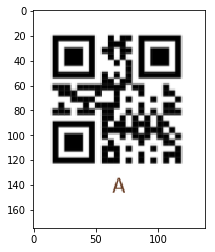

In [13]:
img = []

for i in range(5):
    img.append(cv.imread("QR/"+chr(i+65)+".png"))


plt.imshow(img[0])
plt.show()

In [14]:
qrDetector = cv.QRCodeDetector()

ret = []
points = []
codes = []

for i in range(5):
    retval, point, code = qrDetector.detectAndDecode(img[i])
    ret.append(retval)
    points.append(point)
    codes.append(code)

In [17]:
for i in range(5):
    print(ret[i])

A
B
C
D
E


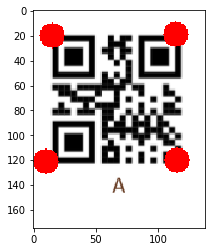

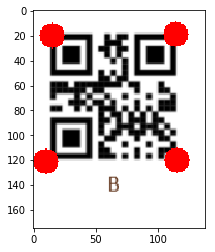

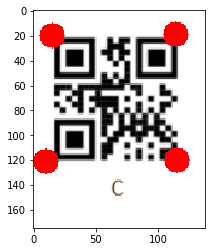

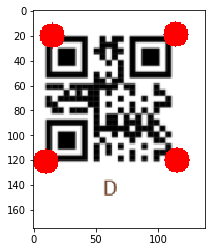

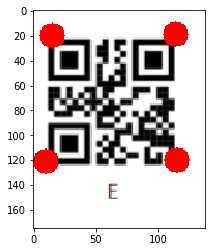

In [34]:
for i in range(5):

    imgDraw = img[i].copy()

    for i in range(4):
        cv.circle(imgDraw, tuple([points[i][i][0][0],points[i][i][0][1]]), 10, (255,0,0), -1)

    plt.imshow(imgDraw)
    plt.show()

In [123]:
img = []
contours = []
threshold = []
for i in range(2):
    img.append(cv.imread("QR/arena"+str(i+1)+".png"))

    #minPreto = np.array([0,0,0], np.uint8)
    #maxPreto = np.array([30,30,30], np.uint8)
    #mascaraPreto = cv.inRange(img[i], minPreto, maxPreto)

    #minBranco = np.array([200,200,200], np.uint8)
    #maxBranco = np.array([255,255,255], np.uint8)
    #mascaraBranco = cv.inRange(img[i], minBranco, minBranco)


    #mascara = cv.bitwise_or(mascaraBranco, mascaraBranco, mask=mascaraPreto)

    #imgFiltrado = cv.bitwise_and(img[i],img[i],mask=mascara)

    gray = cv.cvtColor(img[i], cv.COLOR_BGR2GRAY)

    gray = cv.medianBlur(gray,5)

    threshold.append( cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2))
    
    
    kernel = np.ones((3, 3), np.uint8)
    #thresh = cv.dilate(thresh, kernel, iterations=1)
    contours, _ = cv.findContours(threshold[i], cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

ret = []
points = []
codes = []

for i in range(2):
    imgContour = cv.drawContours(imgContour, contours, -1, (0,255,0), 1)
    retval, point, code = qrDetector.detectAndDecode(threshold[i])
    ret.append(retval)
    points.append(point)
    codes.append(code)
    print("Imagem "+str(i)+":"+retval)



Imagem 0:
Imagem 1:


In [ ]:
imgContour = img[1].copy()
imgContour = cv.drawContours(imgContour, contours, -1, (0,255,0), 1)

imgContour = cv.cvtColor(imgContour, cv.COLOR_BGR2RGB)

plt.imshow(imgContour)

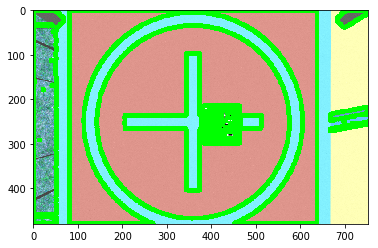

In [99]:
plt.imshow(img[1])

In [117]:
mascaraPreto

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [134]:
from pyzbar.pyzbar import decode


In [230]:
imgTodos = cv.imread("QR/todosQR.png")

data = decode(imgTodos)

data

[Decoded(data='E', type='QRCODE', rect=Rect(left=551, top=19, width=101, height=101), polygon=[Point(x=551, y=19), Point(x=551, y=120), Point(x=652, y=120), Point(x=652, y=19)]),
 Decoded(data='B', type='QRCODE', rect=Rect(left=159, top=21, width=101, height=101), polygon=[Point(x=159, y=21), Point(x=159, y=122), Point(x=260, y=122), Point(x=260, y=21)]),
 Decoded(data='C', type='QRCODE', rect=Rect(left=290, top=21, width=98, height=98), polygon=[Point(x=290, y=21), Point(x=290, y=119), Point(x=388, y=119), Point(x=388, y=21)]),
 Decoded(data='D', type='QRCODE', rect=Rect(left=420, top=20, width=101, height=100), polygon=[Point(x=420, y=20), Point(x=420, y=120), Point(x=521, y=120), Point(x=521, y=20)]),
 Decoded(data='A', type='QRCODE', rect=Rect(left=22, top=21, width=104, height=103), polygon=[Point(x=22, y=21), Point(x=22, y=124), Point(x=126, y=124), Point(x=126, y=21)])]

In [235]:
data = decode(img[1])

In [141]:
data[0].data

'D'

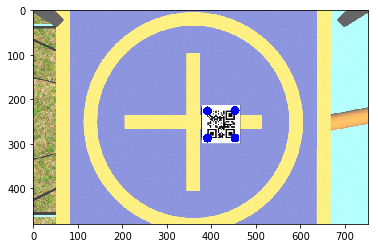

In [154]:
imgDraw = img[1].copy()

for i in range(4):
    cv.circle(imgDraw, tuple([data[0].polygon[i][0],data[0].polygon[i][1]]), 10, (255,0,0), -1)

plt.imshow(cv.cvtColor(imgDraw, cv.COLOR_BGR2RGB))
plt.show()


In [162]:
K = np.array([[215.6810060961547, 0.0, 376.5], [0.0, 215.6810060961547, 240.5], [0.0, 0.0, 1.0]],dtype=np.float32)


In [170]:
pontoReal = np.array([[-3.588e-2,-3.588e-2,0],[-3.588e-2,3.588e-2,0],[3.588e-2,3.588e-2,0],[3.588e-2,-3.588e-2,0]], dtype=np.float32)

pontoImagem = []

for i in range(4):
    pontoImagem.append([data[0].polygon[i][0],data[0].polygon[i][1]])

pontoImagem = np.array(pontoImagem, dtype=np.float32)

In [219]:
a, RObj, tObj, _ = cv.solvePnPRansac(pontoReal,pontoImagem , K, np.zeros((5,1)))

tObj = tObj.ravel()

In [173]:
def inverteTransformacao(R, t):
    RInverso = np.transpose(R)

    tInverso  = - np.matmul(RInverso, t)

    return RInverso, tInverso

In [220]:
RObj, _ = cv.Rodrigues(RObj)

RObjCamera, tObjCamera = inverteTransformacao(RObj, tObj)

A pose do drone no momento da foto era:
- 3.2
- 0.0
- 0.5
- 0.0" 

In [221]:
tDroneWorld = np.array([3.2,0,0.5])
RDroneWorld = np.eye(3)

In [222]:
RObjWordl = np.matmul(RDroneWorld, RObjCamera)
tObjWorld = tDroneWorld+np.matmul(RDroneWorld, tObjCamera)

In [228]:
tObjWorld

array([ 3.1555637 , -0.06572922,  0.26227476])

In [227]:
RObjWordl-np.eye(3)

array([[-0.0005294 , -0.00685684, -0.03180411],
       [ 0.01278708, -0.01833832,  0.19020208],
       [ 0.02991669, -0.19050807, -0.01877033]])

In [213]:
tObjCamera

array([[-0.0444363 ],
       [-0.06572922],
       [-0.23772524]])

In [218]:
RObj.ravel()

array([ 0.9994706 ,  0.01278708,  0.02991669, -0.00685684,  0.98166168,
       -0.19050807, -0.03180411,  0.19020208,  0.98122967])

In [232]:
for i in data:
    print(i.data)

E
B
C
D
A


In [236]:
data[0].data =='D'

True